In [1]:
import pandas as pd 
import matplotlib
%matplotlib inline


In [2]:
def parser(x):
    return pd.datetime.strptime(x,'%Y-%m-%d')
 
df = pd.read_csv('train.csv', header=0,usecols=['date','sales'],parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)



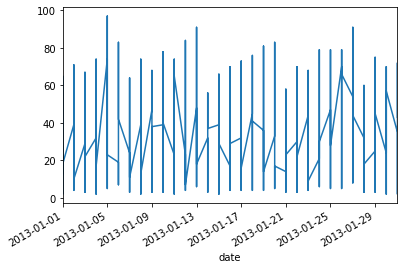

In [3]:
series=df.loc['2013-1-1':'2013-1-31']
#series = series.groupby([lambda x: x.year, lambda x: x.month]).sum()

series.plot()


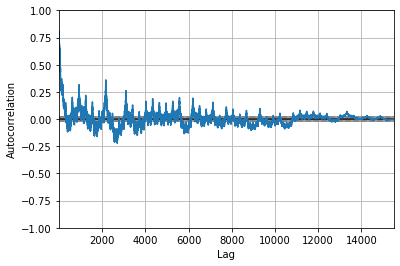

In [ ]:
pd.plotting.autocorrelation_plot(series)

C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                15499
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -53692.448
Method:                       css-mle   S.D. of innovations              7.731
Date:                Wed, 24 Jul 2019   AIC                         107398.896
Time:                        19:53:45   BIC                         107452.436
Sample:                             1   HQIC                        107416.632
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0018      0.021      0.086      0.931      -0.039       0.042
ar.L1.D.sales    -0.6710      0.008    -84.780      0.000      -0.686      -0.655
ar.L2.D.sales    -0.4718      0.009    -

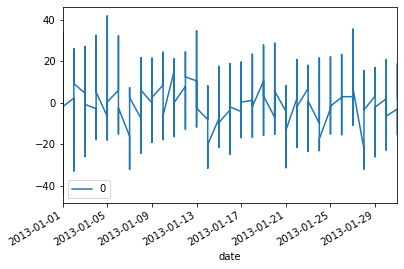

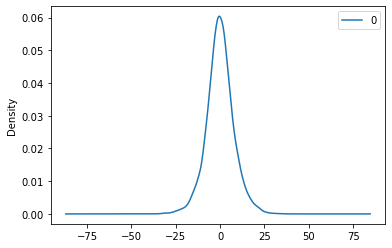

                  0
count  15499.000000
mean      -0.000075
std        7.731653
min      -44.073930
25%       -4.534465
50%       -0.133333
75%        4.444244
max       41.655913


In [ ]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from numpy.linalg import LinAlgError
from matplotlib import pyplot
model = ARIMA(series, order=(5,1,0))
try:
    model_fit = model.fit(disp=0)
except(ValueError, LinAlgError): 
    print("error")
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=45.338094, expected=23.000000
predicted=37.205050, expected=6.000000
predicted=26.116134, expected=15.000000
predicted=23.436334, expected=13.000000
predicted=22.355727, expected=15.000000
predicted=19.483509, expected=12.000000
predicted=13.916609, expected=10.000000
predicted=11.060267, expected=15.000000
predicted=13.471653, expected=9.000000
predicted=12.095794, expected=10.000000
predicted=11.205289, expected=22.000000
predicted=14.690310, expected=15.000000
predicted=14.806845, expected=20.000000
predicted=15.816298, expected=15.000000
predicted=14.997514, expected=15.000000
predicted=15.490826, expected=14.000000
predicted=16.257497, expected=11.000000
predicted=14.166639, expected=11.000000
predicted=13.580272, expected=14.000000
predicted=13.479132, expected=17.000000
predicted=14.700008, expected=5.000000
predicted=10.956957, expected=13.000000
predicted=11.047632, expected=16.000000
predicted=13.655014, expected=14.000000
predicted=13.977995, expected=9.000000
pred

predicted=8.277892, expected=6.000000
predicted=7.610926, expected=11.000000
predicted=9.301715, expected=6.000000
predicted=7.909657, expected=6.000000
predicted=6.792371, expected=12.000000
predicted=8.598608, expected=12.000000
predicted=9.948854, expected=5.000000
predicted=8.138683, expected=10.000000
predicted=8.044403, expected=7.000000
predicted=8.481720, expected=8.000000
predicted=8.864849, expected=16.000000
predicted=10.999149, expected=14.000000
predicted=11.369236, expected=21.000000
predicted=14.282470, expected=22.000000
predicted=16.321092, expected=19.000000
predicted=17.098880, expected=17.000000
predicted=17.523935, expected=20.000000
predicted=18.643379, expected=22.000000
predicted=20.822893, expected=16.000000
predicted=19.014651, expected=23.000000
predicted=19.704181, expected=23.000000
predicted=21.054394, expected=23.000000
predicted=21.746877, expected=13.000000
predicted=18.543873, expected=22.000000
predicted=19.423837, expected=20.000000
predicted=21.1423

C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=14.479311, expected=23.000000
predicted=17.798789, expected=10.000000
predicted=15.345437, expected=12.000000
predicted=14.278198, expected=21.000000
predicted=16.908387, expected=10.000000
predicted=15.075285, expected=14.000000
predicted=14.357246, expected=17.000000
predicted=14.422213, expected=21.000000
predicted=17.244103, expected=12.000000
predicted=15.590899, expected=9.000000
predicted=12.003065, expected=19.000000
predicted=15.522379, expected=16.000000
predicted=16.668793, expected=17.000000
predicted=16.161807, expected=13.000000
predicted=13.854413, expected=13.000000
predicted=13.720325, expected=14.000000
predicted=15.088743, expected=19.000000
predicted=16.247507, expected=16.000000
predicted=15.972662, expected=19.000000
predicted=16.106363, expected=13.000000
predicted=15.135857, expected=14.000000
predicted=15.000461, expected=22.000000
predicted=18.129621, expected=15.000000
predicted=16.946044, expected=18.000000
predicted=16.743548, expected=16.000000
p

predicted=26.978744, expected=31.000000
predicted=27.334641, expected=38.000000
predicted=29.794865, expected=37.000000
predicted=32.321881, expected=23.000000
predicted=27.407378, expected=33.000000
predicted=30.205389, expected=24.000000
predicted=30.098126, expected=28.000000
predicted=29.949625, expected=27.000000
predicted=28.620593, expected=27.000000
predicted=26.993899, expected=28.000000
predicted=27.981158, expected=28.000000
predicted=27.196263, expected=32.000000
predicted=29.099732, expected=21.000000
predicted=26.217293, expected=16.000000
predicted=22.664080, expected=20.000000
predicted=22.738502, expected=35.000000
predicted=27.796059, expected=12.000000
predicted=22.226462, expected=33.000000
predicted=23.224783, expected=34.000000
predicted=27.516976, expected=37.000000
predicted=30.812642, expected=26.000000
predicted=28.968185, expected=26.000000
predicted=26.151605, expected=23.000000
predicted=28.265974, expected=23.000000
predicted=27.232358, expected=19.000000


predicted=52.305550, expected=67.000000
predicted=57.362623, expected=40.000000
predicted=49.685785, expected=28.000000
predicted=43.105068, expected=41.000000
predicted=46.252785, expected=38.000000
predicted=45.995378, expected=40.000000
predicted=43.044432, expected=42.000000
predicted=38.963135, expected=61.000000
predicted=45.318262, expected=43.000000
predicted=45.366330, expected=32.000000
predicted=39.237213, expected=54.000000
predicted=45.387355, expected=60.000000
predicted=52.472781, expected=47.000000
predicted=50.545877, expected=46.000000
predicted=45.468335, expected=52.000000
predicted=48.134956, expected=42.000000
predicted=49.274887, expected=43.000000
predicted=47.064297, expected=48.000000
predicted=46.504410, expected=46.000000
predicted=46.673561, expected=41.000000
predicted=44.661742, expected=29.000000
predicted=38.470700, expected=48.000000
predicted=42.609831, expected=52.000000
predicted=47.122338, expected=36.000000
predicted=41.806364, expected=47.000000


predicted=45.077764, expected=55.000000
predicted=48.410908, expected=34.000000
predicted=41.948112, expected=54.000000
predicted=45.193342, expected=46.000000
predicted=46.362178, expected=60.000000
predicted=50.941877, expected=42.000000
predicted=48.179195, expected=32.000000
predicted=40.637534, expected=47.000000
predicted=45.876565, expected=63.000000
predicted=52.350004, expected=40.000000
predicted=47.998198, expected=49.000000
predicted=44.537431, expected=64.000000
predicted=51.555939, expected=53.000000
predicted=54.047845, expected=34.000000
predicted=47.068061, expected=40.000000
predicted=43.234811, expected=36.000000
predicted=44.211501, expected=48.000000
predicted=47.013217, expected=47.000000
predicted=45.015507, expected=56.000000
predicted=45.897965, expected=57.000000
predicted=49.593549, expected=35.000000
predicted=43.997721, expected=37.000000
predicted=43.021136, expected=51.000000
predicted=47.622512, expected=50.000000
predicted=49.786592, expected=52.000000


predicted=11.438362, expected=9.000000
predicted=11.050896, expected=8.000000
predicted=10.191856, expected=8.000000
predicted=9.775782, expected=16.000000
predicted=11.712693, expected=12.000000
predicted=12.067336, expected=14.000000
predicted=11.537222, expected=23.000000
predicted=15.237857, expected=8.000000
predicted=12.901147, expected=12.000000
predicted=12.844416, expected=10.000000
predicted=12.367209, expected=12.000000
predicted=13.010513, expected=11.000000
predicted=12.820615, expected=11.000000
predicted=10.610444, expected=5.000000
predicted=9.138791, expected=8.000000
predicted=8.762648, expected=15.000000
predicted=11.455302, expected=13.000000
predicted=11.677778, expected=7.000000
predicted=9.278709, expected=10.000000
predicted=8.993277, expected=11.000000
predicted=10.734754, expected=8.000000
predicted=10.480406, expected=14.000000
predicted=11.094917, expected=15.000000
predicted=11.915590, expected=8.000000
predicted=10.573226, expected=7.000000
predicted=9.246

C:\Users\magic\Anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=17.791550, expected=21.000000
predicted=19.261333, expected=14.000000
predicted=18.710210, expected=14.000000
predicted=16.646776, expected=21.000000
predicted=18.489382, expected=24.000000
predicted=20.488515, expected=22.000000
predicted=20.337206, expected=28.000000
predicted=21.649366, expected=32.000000
predicted=25.258773, expected=25.000000
predicted=25.543978, expected=22.000000
predicted=24.236463, expected=24.000000
predicted=24.637616, expected=16.000000
predicted=23.024965, expected=23.000000
predicted=23.332392, expected=23.000000
predicted=22.793001, expected=26.000000
predicted=23.294424, expected=15.000000
predicted=20.189825, expected=14.000000
predicted=17.456813, expected=18.000000
predicted=19.241536, expected=10.000000
predicted=16.661587, expected=17.000000
predicted=16.608206, expected=24.000000
predicted=18.184390, expected=25.000000
predicted=20.029805, expected=21.000000
predicted=19.683806, expected=16.000000
predicted=17.557152, expected=18.000000


predicted=46.672047, expected=49.000000
predicted=48.300924, expected=59.000000
predicted=52.298493, expected=51.000000
predicted=53.369151, expected=52.000000
predicted=50.098233, expected=45.000000
predicted=47.061724, expected=42.000000
predicted=47.623010, expected=43.000000
predicted=47.560843, expected=29.000000
predicted=41.058409, expected=41.000000
predicted=41.172492, expected=45.000000
predicted=42.469304, expected=42.000000
predicted=41.429291, expected=36.000000
predicted=38.596441, expected=36.000000
predicted=36.786550, expected=26.000000
predicted=35.325093, expected=30.000000
predicted=34.297933, expected=32.000000
predicted=33.765667, expected=38.000000
predicted=34.461667, expected=31.000000
predicted=32.584570, expected=34.000000
predicted=31.611571, expected=34.000000
predicted=33.242302, expected=23.000000
predicted=30.290854, expected=36.000000
predicted=32.694767, expected=29.000000
predicted=31.486177, expected=32.000000
predicted=31.411344, expected=35.000000


predicted=22.360862, expected=28.000000
predicted=23.076206, expected=25.000000
predicted=24.006811, expected=25.000000
predicted=24.923944, expected=18.000000
predicted=23.703802, expected=20.000000
predicted=22.160108, expected=23.000000
predicted=23.350351, expected=23.000000
predicted=22.912654, expected=21.000000
predicted=21.737018, expected=14.000000
predicted=18.385955, expected=23.000000
predicted=20.529218, expected=17.000000
predicted=20.201086, expected=18.000000
predicted=19.006644, expected=21.000000
predicted=19.387514, expected=15.000000
predicted=17.501139, expected=32.000000
predicted=22.935527, expected=22.000000
predicted=22.067587, expected=16.000000
predicted=19.240327, expected=25.000000
predicted=21.648291, expected=23.000000
predicted=22.644819, expected=35.000000
predicted=27.818245, expected=26.000000
predicted=25.524733, expected=36.000000
predicted=27.812083, expected=38.000000
predicted=32.290973, expected=37.000000
predicted=33.442402, expected=33.000000


predicted=18.778897, expected=36.000000
predicted=24.462067, expected=28.000000
predicted=23.826969, expected=32.000000
predicted=24.898418, expected=27.000000
predicted=26.231358, expected=27.000000
predicted=27.103308, expected=40.000000
predicted=33.426007, expected=21.000000
predicted=28.500940, expected=27.000000
predicted=27.549664, expected=27.000000
predicted=27.814383, expected=29.000000
predicted=28.805999, expected=27.000000
predicted=28.828173, expected=35.000000
predicted=28.761714, expected=37.000000
predicted=32.118238, expected=23.000000
predicted=28.548278, expected=29.000000
predicted=28.655266, expected=31.000000
predicted=30.449418, expected=29.000000
predicted=30.913816, expected=37.000000
predicted=32.351326, expected=38.000000
predicted=32.767561, expected=36.000000
predicted=33.971179, expected=29.000000
predicted=32.163292, expected=34.000000
predicted=33.054409, expected=32.000000
predicted=34.219257, expected=22.000000
predicted=30.111417, expected=42.000000


predicted=18.272300, expected=24.000000
predicted=19.128240, expected=12.000000
predicted=16.032602, expected=18.000000
predicted=17.632561, expected=15.000000
predicted=17.514921, expected=17.000000
predicted=17.954192, expected=20.000000
predicted=18.475044, expected=26.000000
predicted=19.669756, expected=21.000000
predicted=20.266578, expected=11.000000
predicted=16.420441, expected=13.000000
predicted=16.004507, expected=17.000000
predicted=17.836852, expected=14.000000
predicted=17.204308, expected=18.000000
predicted=16.231656, expected=10.000000
predicted=13.139106, expected=14.000000
predicted=13.697605, expected=10.000000
predicted=13.288657, expected=9.000000
predicted=11.681771, expected=11.000000
predicted=11.866192, expected=7.000000
predicted=9.666368, expected=12.000000
predicted=10.704320, expected=14.000000
predicted=11.475846, expected=11.000000
predicted=10.957181, expected=15.000000
predicted=12.103158, expected=15.000000
predicted=12.870489, expected=16.000000
pre

predicted=7.785875, expected=14.000000
predicted=10.969949, expected=15.000000
predicted=12.598074, expected=11.000000
predicted=11.119811, expected=20.000000
predicted=13.138594, expected=12.000000
predicted=13.425719, expected=5.000000
predicted=10.900927, expected=14.000000
predicted=12.390579, expected=4.000000
predicted=10.142152, expected=10.000000
predicted=10.537994, expected=7.000000
predicted=8.650432, expected=9.000000
predicted=8.160376, expected=9.000000
predicted=9.142810, expected=14.000000
predicted=9.739694, expected=10.000000
predicted=10.249960, expected=13.000000
predicted=10.541661, expected=11.000000
predicted=11.024284, expected=16.000000
predicted=12.748322, expected=6.000000
predicted=10.935734, expected=15.000000
predicted=11.754844, expected=10.000000
predicted=11.943609, expected=14.000000
predicted=12.241507, expected=3.000000
predicted=9.480953, expected=13.000000
predicted=9.830693, expected=11.000000
predicted=11.666964, expected=19.000000
predicted=13.2

predicted=8.316367, expected=10.000000
predicted=9.802886, expected=11.000000
predicted=9.629295, expected=23.000000
predicted=13.328631, expected=17.000000
predicted=13.952518, expected=9.000000
predicted=12.290896, expected=15.000000
predicted=13.339679, expected=16.000000
predicted=15.452845, expected=12.000000
predicted=15.248660, expected=21.000000
predicted=15.999849, expected=13.000000
predicted=14.420583, expected=16.000000
predicted=15.196283, expected=16.000000
predicted=15.750061, expected=20.000000
predicted=16.997101, expected=17.000000
predicted=17.597955, expected=11.000000
predicted=14.337978, expected=17.000000
predicted=15.778223, expected=11.000000
predicted=14.814261, expected=18.000000
predicted=16.040949, expected=19.000000
predicted=16.648999, expected=15.000000
predicted=15.220740, expected=19.000000
predicted=16.715464, expected=6.000000
predicted=12.950424, expected=18.000000
predicted=15.481270, expected=17.000000
predicted=16.682930, expected=11.000000
predi

predicted=25.797475, expected=29.000000
predicted=25.754987, expected=16.000000
predicted=22.236591, expected=19.000000
predicted=21.401131, expected=18.000000
predicted=23.113485, expected=23.000000
predicted=22.824264, expected=29.000000
predicted=24.335178, expected=18.000000
predicted=20.374233, expected=19.000000
predicted=19.774116, expected=12.000000
predicted=17.954055, expected=29.000000
predicted=22.760135, expected=26.000000
predicted=24.392345, expected=27.000000
predicted=22.908753, expected=17.000000
predicted=20.522583, expected=18.000000
predicted=19.638677, expected=21.000000
predicted=22.707419, expected=24.000000
predicted=23.017130, expected=17.000000
predicted=20.497304, expected=20.000000
predicted=19.007608, expected=8.000000
predicted=16.024614, expected=14.000000
predicted=16.002295, expected=10.000000
predicted=14.933450, expected=17.000000
predicted=14.884746, expected=15.000000
predicted=14.887008, expected=15.000000
predicted=13.335506, expected=30.000000
p

predicted=26.483490, expected=23.000000
predicted=24.968023, expected=26.000000
predicted=27.297276, expected=25.000000
predicted=27.269619, expected=30.000000
predicted=27.402237, expected=25.000000
predicted=25.682545, expected=28.000000
predicted=26.137724, expected=20.000000
predicted=24.631642, expected=23.000000
predicted=24.203526, expected=19.000000
predicted=23.413269, expected=24.000000
predicted=23.217003, expected=24.000000
predicted=23.700333, expected=30.000000
predicted=24.670761, expected=36.000000
predicted=28.331554, expected=25.000000
predicted=26.343336, expected=32.000000
predicted=28.279114, expected=17.000000
predicted=25.362806, expected=25.000000
predicted=26.166995, expected=23.000000
predicted=26.324291, expected=35.000000
predicted=28.003879, expected=32.000000
predicted=29.321713, expected=24.000000
predicted=25.256319, expected=25.000000
predicted=26.022282, expected=21.000000
predicted=25.276764, expected=32.000000
predicted=28.997941, expected=36.000000


predicted=19.975344, expected=19.000000
predicted=20.311036, expected=20.000000
predicted=20.241722, expected=24.000000
predicted=21.601707, expected=20.000000
predicted=20.981927, expected=17.000000
predicted=19.515759, expected=40.000000
predicted=26.143046, expected=25.000000
predicted=26.020219, expected=38.000000
predicted=28.717570, expected=31.000000
predicted=29.175808, expected=36.000000
predicted=31.356844, expected=36.000000
predicted=35.079239, expected=31.000000
predicted=32.283001, expected=28.000000
predicted=32.055063, expected=34.000000
predicted=32.513564, expected=37.000000
predicted=34.865619, expected=39.000000
predicted=35.613029, expected=54.000000
predicted=40.481009, expected=39.000000
predicted=39.352307, expected=23.000000
predicted=33.737554, expected=35.000000
predicted=35.555544, expected=38.000000
predicted=38.686150, expected=38.000000
predicted=39.182542, expected=36.000000
predicted=35.264226, expected=44.000000
predicted=36.618052, expected=46.000000


predicted=18.829072, expected=15.000000
predicted=17.788414, expected=16.000000
predicted=17.050233, expected=21.000000
predicted=19.877027, expected=19.000000
predicted=18.919392, expected=26.000000
predicted=20.100163, expected=22.000000
predicted=20.525026, expected=7.000000
predicted=15.950737, expected=12.000000
predicted=15.522603, expected=14.000000
predicted=16.295672, expected=15.000000
predicted=16.588960, expected=16.000000
predicted=15.108822, expected=22.000000
predicted=15.633049, expected=19.000000
predicted=17.157278, expected=16.000000
predicted=16.569593, expected=15.000000
predicted=16.306836, expected=13.000000
predicted=15.896305, expected=19.000000
predicted=17.713364, expected=13.000000
predicted=15.829839, expected=8.000000
predicted=12.572699, expected=9.000000
predicted=11.607694, expected=16.000000
predicted=13.591231, expected=17.000000
predicted=15.160332, expected=11.000000
predicted=12.330097, expected=12.000000
predicted=11.474190, expected=20.000000
pre

predicted=31.313638, expected=49.000000
predicted=36.403369, expected=52.000000
predicted=41.947284, expected=48.000000
predicted=45.403931, expected=36.000000
predicted=42.319625, expected=36.000000
predicted=41.129162, expected=45.000000
predicted=44.407920, expected=40.000000
predicted=43.434158, expected=48.000000
predicted=43.442706, expected=51.000000
predicted=44.515329, expected=42.000000
predicted=43.449935, expected=29.000000
predicted=39.225726, expected=39.000000
predicted=39.687568, expected=41.000000
predicted=42.324588, expected=39.000000
predicted=40.886052, expected=38.000000
predicted=38.030524, expected=49.000000
predicted=40.567374, expected=50.000000
predicted=44.831767, expected=34.000000
predicted=40.571678, expected=34.000000
predicted=37.982353, expected=43.000000
predicted=41.131717, expected=40.000000
predicted=42.436015, expected=40.000000
predicted=40.567021, expected=48.000000
predicted=41.114088, expected=45.000000
predicted=42.636706, expected=31.000000


predicted=28.843804, expected=23.000000
predicted=26.684189, expected=25.000000
predicted=25.950570, expected=38.000000
predicted=29.279040, expected=42.000000
predicted=33.050364, expected=44.000000
predicted=35.854440, expected=23.000000
predicted=30.351570, expected=29.000000
predicted=30.649406, expected=23.000000
predicted=31.280451, expected=24.000000
predicted=29.788730, expected=47.000000
predicted=35.166227, expected=50.000000
predicted=37.545640, expected=42.000000
predicted=37.559075, expected=67.000000
predicted=45.618241, expected=68.000000
predicted=53.948502, expected=70.000000
predicted=60.218745, expected=34.000000
predicted=50.706050, expected=51.000000
predicted=51.166872, expected=40.000000
predicted=52.910151, expected=54.000000
predicted=53.539656, expected=56.000000
predicted=53.419081, expected=76.000000
predicted=56.498908, expected=91.000000
predicted=68.430632, expected=42.000000
predicted=57.015862, expected=57.000000
predicted=57.614736, expected=49.000000


predicted=35.618809, expected=48.000000
predicted=39.826318, expected=50.000000
predicted=41.520595, expected=44.000000
predicted=42.778667, expected=24.000000
predicted=35.783854, expected=35.000000
predicted=37.075935, expected=34.000000
predicted=38.919901, expected=32.000000
predicted=36.557659, expected=44.000000
predicted=37.307836, expected=48.000000
predicted=38.901619, expected=37.000000
predicted=38.555505, expected=26.000000
predicted=33.687494, expected=36.000000
predicted=35.550973, expected=37.000000
predicted=38.655947, expected=30.000000
predicted=35.494909, expected=33.000000
predicted=32.707703, expected=37.000000
predicted=33.673661, expected=36.000000
predicted=35.565592, expected=24.000000
predicted=31.244793, expected=37.000000
predicted=32.566897, expected=26.000000
predicted=31.677831, expected=36.000000
predicted=33.106717, expected=20.000000
predicted=28.524990, expected=19.000000
predicted=24.372427, expected=13.000000
predicted=22.681068, expected=29.000000


predicted=40.669779, expected=38.000000
predicted=40.884651, expected=44.000000
predicted=40.869664, expected=17.000000
predicted=32.356560, expected=15.000000
predicted=27.048306, expected=5.000000
predicted=23.110487, expected=13.000000
predicted=20.308884, expected=12.000000
predicted=18.061042, expected=13.000000
predicted=12.993854, expected=9.000000
predicted=10.877796, expected=9.000000
predicted=9.432970, expected=11.000000
predicted=11.109288, expected=15.000000
predicted=12.416982, expected=9.000000
predicted=11.034931, expected=7.000000
predicted=8.966847, expected=19.000000
predicted=12.705407, expected=7.000000
predicted=11.366592, expected=16.000000
predicted=12.443729, expected=6.000000
predicted=9.955816, expected=4.000000
predicted=8.082146, expected=8.000000
predicted=9.516764, expected=17.000000
predicted=11.378784, expected=17.000000
predicted=13.480280, expected=12.000000
predicted=10.909725, expected=13.000000
predicted=11.269315, expected=10.000000
predicted=12.0

predicted=7.819945, expected=16.000000
predicted=11.168912, expected=11.000000
predicted=10.816312, expected=5.000000
predicted=8.436181, expected=6.000000
predicted=7.873986, expected=7.000000
predicted=9.255589, expected=8.000000
predicted=9.127231, expected=10.000000
predicted=8.496250, expected=10.000000
predicted=8.187966, expected=10.000000
predicted=8.731125, expected=7.000000
predicted=8.239200, expected=9.000000
predicted=8.727777, expected=19.000000
predicted=12.529437, expected=16.000000
predicted=13.430218, expected=8.000000
predicted=10.710966, expected=17.000000
predicted=12.528492, expected=18.000000
predicted=15.498310, expected=18.000000
predicted=16.889236, expected=14.000000
predicted=14.908331, expected=12.000000
predicted=13.402944, expected=16.000000
predicted=15.674261, expected=19.000000
predicted=17.113227, expected=18.000000
predicted=16.954225, expected=17.000000
predicted=16.072703, expected=16.000000
predicted=15.954288, expected=14.000000
predicted=16.0107

predicted=29.095438, expected=29.000000
predicted=30.157016, expected=32.000000
predicted=31.614253, expected=26.000000
predicted=28.195407, expected=41.000000
predicted=32.765794, expected=15.000000
predicted=25.871983, expected=26.000000
predicted=26.191603, expected=36.000000
predicted=30.894122, expected=19.000000
predicted=26.738600, expected=46.000000
predicted=32.925915, expected=37.000000
predicted=32.184988, expected=47.000000
predicted=37.276114, expected=21.000000
predicted=32.004877, expected=33.000000
predicted=31.345894, expected=25.000000
predicted=33.564067, expected=28.000000
predicted=31.215257, expected=33.000000
predicted=32.166608, expected=42.000000
predicted=32.811164, expected=33.000000
predicted=33.279047, expected=9.000000
predicted=23.749202, expected=27.000000
predicted=26.174049, expected=35.000000
predicted=31.933158, expected=32.000000
predicted=31.950079, expected=21.000000
predicted=25.202916, expected=22.000000
predicted=22.204282, expected=24.000000
p

predicted=33.664223, expected=25.000000
predicted=28.900149, expected=23.000000
predicted=29.066243, expected=34.000000
predicted=33.072803, expected=18.000000
predicted=29.266444, expected=10.000000
predicted=20.154122, expected=17.000000
predicted=19.446259, expected=22.000000
predicted=21.548071, expected=15.000000
predicted=19.710363, expected=19.000000
predicted=16.846008, expected=10.000000
predicted=14.237148, expected=13.000000
predicted=14.915484, expected=7.000000
predicted=13.178582, expected=19.000000
predicted=14.637039, expected=15.000000
predicted=15.042494, expected=15.000000
predicted=13.412969, expected=18.000000
predicted=14.945614, expected=16.000000
predicted=15.107323, expected=18.000000
predicted=17.083496, expected=16.000000
predicted=16.284882, expected=18.000000
predicted=16.901716, expected=13.000000
predicted=15.944083, expected=16.000000
predicted=15.814046, expected=19.000000
predicted=17.299523, expected=8.000000
predicted=13.958475, expected=10.000000
pr